# **Classification of Exoplanets EDA & ML Analysis**

In [1]:
import pandas as pd
# read json file
import json as js
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from plotly import express as px
# import plotly tree module
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, f1_score, precision_score, recall_score
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
# import logistic regression
from sklearn.linear_model import LogisticRegression
# import svm
from sklearn.svm import SVC
# import naive bayes
from sklearn.naive_bayes import GaussianNB
# import knn
from sklearn.neighbors import KNeighborsClassifier
# import decision tree
from sklearn.tree import DecisionTreeClassifier
# import random forest
# import xgboost
from xgboost import XGBClassifier
# import lightgbm
from lightgbm import LGBMClassifier
# import mlxtend
from mlxtend.plotting import plot_confusion_matrix
# import mlxtend
from sklearn.metrics import roc_auc_score
warnings.filterwarnings('ignore')
exodata = pd.read_csv("/kaggle/input/nasaexoplanets/cleaned_5250.csv")


# **Data Preprocessing & Cleaning**

In [2]:
print(exodata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB
None


In [3]:
print(exodata.describe())

           distance  stellar_magnitude  discovery_year  mass_multiplier  \
count   5233.000000        5089.000000     5250.000000      5227.000000   
mean    2167.168737          12.683738     2015.732190         6.434812   
std     3245.522087           3.107571        4.307336        12.972727   
min        4.000000           0.872000     1992.000000         0.020000   
25%      389.000000          10.939000     2014.000000         1.804000   
50%     1371.000000          13.543000     2016.000000         4.170140   
75%     2779.000000          15.021000     2018.000000         8.000000   
max    27727.000000          44.610000     2023.000000       752.000000   

       radius_multiplier  orbital_radius  orbital_period  eccentricity  
count        5233.000000     4961.000000    5.250000e+03   5250.000000  
mean            1.015121        6.962942    4.791509e+02      0.063568  
std             0.603479      138.673600    1.680445e+04      0.141424  
min             0.200000        

In [4]:
print(exodata.head())

                   name  distance  stellar_magnitude planet_type  \
0  11 Comae Berenices b     304.0            4.72307   Gas Giant   
1    11 Ursae Minoris b     409.0            5.01300   Gas Giant   
2       14 Andromedae b     246.0            5.23133   Gas Giant   
3         14 Herculis b      58.0            6.61935   Gas Giant   
4          16 Cygni B b      69.0            6.21500   Gas Giant   

   discovery_year  mass_multiplier mass_wrt  radius_multiplier radius_wrt  \
0            2007         19.40000  Jupiter               1.08    Jupiter   
1            2009         14.74000  Jupiter               1.09    Jupiter   
2            2008          4.80000  Jupiter               1.15    Jupiter   
3            2002          8.13881  Jupiter               1.12    Jupiter   
4            1996          1.78000  Jupiter               1.20    Jupiter   

   orbital_radius  orbital_period  eccentricity detection_method  
0        1.290000        0.892539          0.23  Radial Veloc

In [5]:
print(exodata.isnull().sum())

name                   0
distance              17
stellar_magnitude    161
planet_type            0
discovery_year         0
mass_multiplier       23
mass_wrt              23
radius_multiplier     17
radius_wrt            17
orbital_radius       289
orbital_period         0
eccentricity           0
detection_method       0
dtype: int64


In [6]:
print(exodata.duplicated().sum())

0


In [7]:
# Identify categorical and numerical columns
categorical_columns = exodata.select_dtypes(include=['object']).columns
numerical_columns = exodata.select_dtypes(include=['int64', 'float64']).columns

# Print the identified columns
print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)



Categorical Columns:
Index(['name', 'planet_type', 'mass_wrt', 'radius_wrt', 'detection_method'], dtype='object')

Numerical Columns:
Index(['distance', 'stellar_magnitude', 'discovery_year', 'mass_multiplier',
       'radius_multiplier', 'orbital_radius', 'orbital_period',
       'eccentricity'],
      dtype='object')


In [8]:
exodata.dropna(inplace=True)

# **Feature Engineering**

In [9]:
# Identify Potential Features & Create New Features

# Create 2 additional columns for Earth Mass and Earth Radius
#exodata['mass_earth'] = exodata['mass_multiplier'] * 317.8
#exodata['radius_earth'] = exodata['radius_multiplier'] * 109.3

exodata['mass_earth'] = exodata.apply(axis='columns', func=lambda x: x['mass_multiplier'] if x['mass_wrt'] == 'Earth' else 317.8 * x['mass_multiplier'])
exodata['radius_earth'] = exodata.apply(axis='columns', func=lambda x: x['radius_multiplier'] if x['radius_wrt'] == 'Earth' else 11.2 * x['radius_multiplier'])


# Exoplanet Habitable conservative Criteria
# 0.5 < Planet Radius ≤ 1.6 Earth radii or 0.1 < Planet Minimum Mass ≤ 3 Earth masses)

radius_criteria_consv = (exodata['radius_earth'] < 1.6) & (exodata['radius_earth'] > 0.5)
mass_criteria_consv = (exodata['mass_earth'] < 3) & (exodata['mass_earth'] > 0.1)
orbit_criteria_consv = (exodata['orbital_period'] < 3) & (exodata['orbital_period'] > 1/3)
exodata['is_habitable_consv'] = radius_criteria_consv & mass_criteria_consv & orbit_criteria_consv
exodata['is_habitable_consv'] = exodata['is_habitable_consv'].apply(lambda x: 1 if x else 0)
exodata['is_habitable_consv'] = exodata['is_habitable_consv'].astype(int)

# Exoplanet Habitable Optimistic Criteria
# 1.6 < Planet Radius ≤ 2.5 Earth radii or 3 < Planet Minimum Mass ≤ 10 Earth masses
radius_criteria_optim = (exodata['radius_earth'] < 2.5) & (exodata['radius_earth'] > 1.6)
mass_criteria_optim = (exodata['mass_earth'] < 10) & (exodata['mass_earth'] > 3)
orbit_criteria_optim = (exodata['orbital_period'] < 3) & (exodata['orbital_period'] > 1/3)
exodata['is_habitable_optim'] = radius_criteria_optim & mass_criteria_optim & orbit_criteria_optim
exodata['is_habitable_optim'] = exodata['is_habitable_optim'].apply(lambda x: 1 if x else 0)
exodata['is_habitable_optim'] = exodata['is_habitable_optim'].astype(int)

# Exoplanet Habitable Pessimistic Criteria
# 2.5 < Planet Radius ≤ 5 Earth radii or 10 < Planet Minimum Mass ≤ 30 Earth masses
radius_criteria_pessi = (exodata['radius_earth'] < 5) & (exodata['radius_earth'] > 2.5)
mass_criteria_pessi = (exodata['mass_earth'] < 30) & (exodata['mass_earth'] > 10)
orbit_criteria_pessi = (exodata['orbital_period'] < 3) & (exodata['orbital_period'] > 1/3)
exodata['is_habitable_pessi'] = radius_criteria_pessi & mass_criteria_pessi & orbit_criteria_pessi
exodata['is_habitable_pessi'] = exodata['is_habitable_pessi'].apply(lambda x: 1 if x else 0)
exodata['is_habitable_pessi'] = exodata['is_habitable_pessi'].astype(int)

# Exoplanet Habitable Extreme Criteria
# 5 < Planet Radius ≤ 10 Earth radii or 30 < Planet Minimum Mass ≤ 100 Earth masses
radius_criteria_extrem = (exodata['radius_earth'] < 10) & (exodata['radius_earth'] > 5)
mass_criteria_extrem = (exodata['mass_earth'] < 100) & (exodata['mass_earth'] > 30)
orbit_criteria_extrem = (exodata['orbital_period'] < 3) & (exodata['orbital_period'] > 1/3)
exodata['is_habitable_extrem'] = radius_criteria_extrem & mass_criteria_extrem & orbit_criteria_extrem
exodata['is_habitable_extrem'] = exodata['is_habitable_extrem'].apply(lambda x: 1 if x else 0)
exodata['is_habitable_extrem'] = exodata['is_habitable_extrem'].astype(int)

# Exoplanet Habitable Criteria
orbit_criteria = (exodata['orbital_period'] < 3) & (exodata['orbital_period'] > 1/3)
radius_criteria = (exodata['radius_earth'] > 1/10) & (exodata['radius_earth'] < 3)
mass_criteria = (exodata['mass_earth'] < 10 ) & (exodata['mass_earth'] > 3)
exodata['is_habitable'] = orbit_criteria & radius_criteria & mass_criteria
exodata['is_habitable'] = exodata['is_habitable'].apply(lambda x: 1 if x else 0)
exodata['is_habitable'] = exodata['is_habitable'].astype(int)

# Convert Orbital Period Float data to Days
orbit_period_days = exodata['orbital_period'] * 365.25
exodata['orbital_period_days'] = orbit_period_days.apply(np.ceil)

# Criteria Calculation For The Habitable Exoplanets by mass, radius, orbital period etc..

def classify_distance(distance):
    if distance <= 1000:
        return 'Close'
    elif distance <= 3000:
        return 'Medium'
    else:
        return 'Far'

exodata['distance_group'] = exodata['distance'].apply(classify_distance)

def classify_stellar_magnitude(stellar_magnitude):
    if stellar_magnitude <= 5:
        return 'Low'
    elif stellar_magnitude <= 10:
        return 'Medium'
    else:
        return 'High'

exodata['stellar_magnitude_group'] = exodata['stellar_magnitude'].apply(classify_stellar_magnitude)

def classify_mass(mass):
    if mass <= 1:
        return 'Small'
    elif mass <= 10:
        return 'Medium'
    else:
        return 'Large'
exodata['mass_group'] = exodata['mass_multiplier'].apply(classify_mass)

def classify_radius(radius):
    if radius <= 1:
        return 'Small'
    elif radius <= 10:
        return 'Medium'
    else:
        return 'Large'
exodata['radius_group'] = exodata['radius_multiplier'].apply(classify_radius)

def classify_orbital_radius(orbital_radius):
    if orbital_radius <= 100:
        return 'Small'
    elif orbital_radius <= 1000:
        return 'Medium'
    else:
        return 'Large'

exodata['orbital_radius_group'] = exodata['orbital_radius'].apply(classify_orbital_radius)


def classify_orbital_period(orbital_period):
    if orbital_period <= 100:
        return 'Small'
    elif orbital_period <= 1000:
        return 'Medium'
    else:
        return 'Large'

exodata['orbital_period_group'] = exodata['orbital_period'].apply(classify_orbital_period)


def classify_eccentricity(eccentricity):
    if eccentricity <= 0.2:
        return 'Small'
    elif eccentricity <= 0.5:
        return 'Medium'
    else:
        return 'Large'

exodata['eccentricity_group'] = exodata['eccentricity'].apply(classify_eccentricity)

# **Check for Outliers**

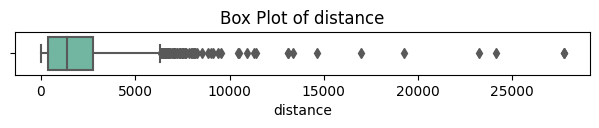

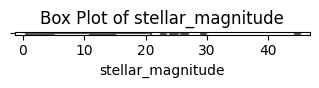

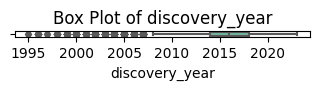

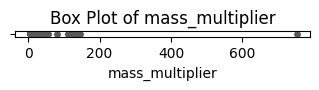

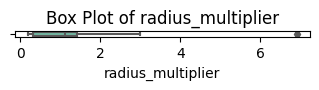

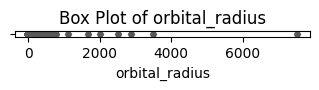

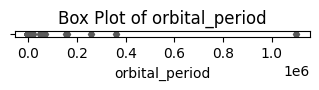

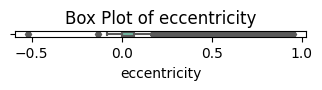

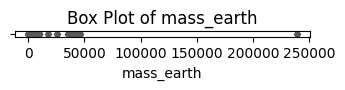

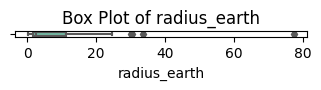

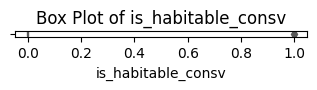

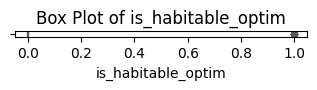

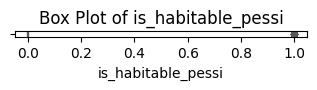

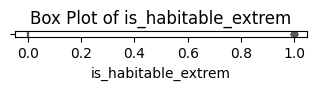

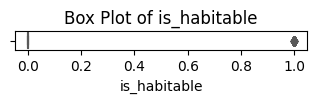

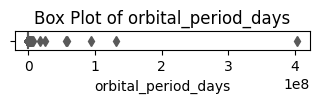

In [10]:
# Check for Outliers
# Calculate the IQR for each numerical column
# Interquartile Range (IQR)
#q1 = exodata.select_dtypes(include=['int64', 'float64']).quantile(0.25)
#q3 = exodata.select_dtypes(include=['int64', 'float64']).quantile(0.75)
#iqr = q3 - q1

# Check for Outliers using KNN for numerical columns
#knn_imputer = KNNImputer(n_neighbors=5)
#exodata_imputed = knn_imputer.fit_transform(exodata)
#exodata_imputed = pd.DataFrame(exodata_imputed, columns=exodata.columns)

# Calculate the IQR for each numerical column
iqr = exodata.select_dtypes(include=['int64', 'float64']).quantile(0.75) - exodata.select_dtypes(include=['int64', 'float64']).quantile(0.25)
# Identify outliers based on the IQR
numerical_columns = exodata.select_dtypes(include=['int64', 'float64']).columns
num_columns = len(numerical_columns)
num_rows = (num_columns + 1) // 2

# Create a figure with subplots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x=exodata[column], hue=iqr[column] , palette='Set2')
    plt.xlabel(column)
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()


# **Univariate Analysis**

In [11]:
# Univariate Analysis of Distance
distance = exodata['distance']
print(distance.describe())

# Create a histogram
px.histogram(distance, nbins=20, title='Histogram of Distance').show()

# Create a box plot
px.box(distance, title='Box Plot of Distance').show()






count     4765.000000
mean      1796.385519
std       1813.067120
min          4.000000
25%        358.000000
50%       1386.000000
75%       2741.000000
max      27727.000000
Name: distance, dtype: float64


count    4765.000000
mean       12.692694
std         3.150680
min         0.872000
25%        10.883000
50%        13.629000
75%        15.061000
max        44.610000
Name: stellar_magnitude, dtype: float64


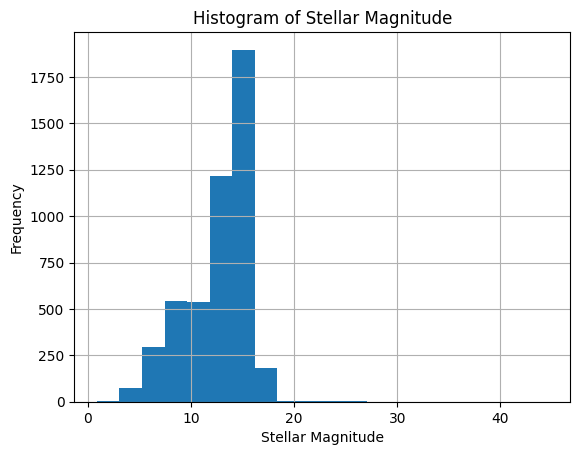

In [12]:
# Univariate Analysis of stellar_magnitude
stellar_magnitude = exodata['stellar_magnitude']
print(stellar_magnitude.describe())
stellar_magnitude.hist(bins=20)
plt.xlabel('Stellar Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Stellar Magnitude')
plt.show()


count    4765.000000
mean     2015.484365
std         4.229611
min      1995.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2023.000000
Name: discovery_year, dtype: float64


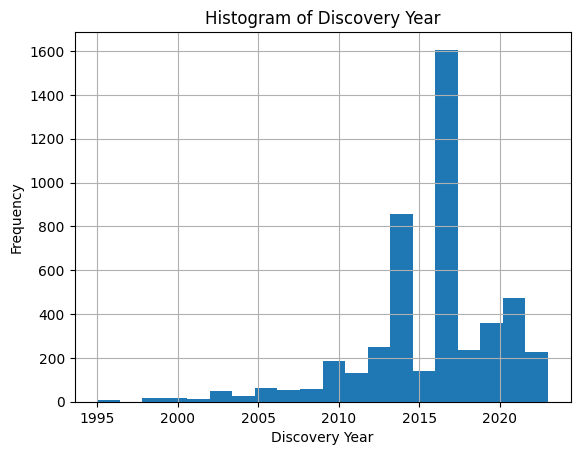

In [13]:
# Univariate analysis of discovery_year
discovery_year = exodata['discovery_year']
print(discovery_year.describe())
discovery_year.hist(bins=20)
plt.xlabel('Discovery Year')
plt.ylabel('Frequency')
plt.title('Histogram of Discovery Year')
plt.show()


count    4765.000000
mean        6.424598
std        13.392832
min         0.027500
25%         1.790000
50%         4.190000
75%         8.050000
max       752.000000
Name: mass_multiplier, dtype: float64


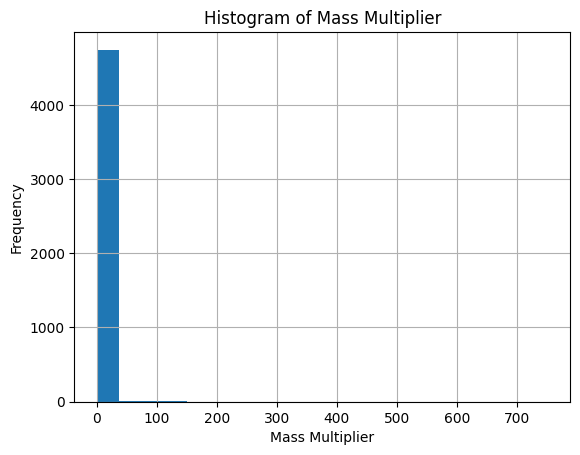

In [14]:
# Univariate analysis of mass multiplier
mass_multiplier = exodata['mass_multiplier']
print(mass_multiplier.describe())
mass_multiplier.hist(bins=20)
plt.xlabel('Mass Multiplier')
plt.ylabel('Frequency')
plt.title('Histogram of Mass Multiplier')
plt.show()


count    4765.000000
mean        1.014006
std         0.608620
min         0.200000
25%         0.317000
50%         1.120000
75%         1.420000
max         6.900000
Name: radius_multiplier, dtype: float64


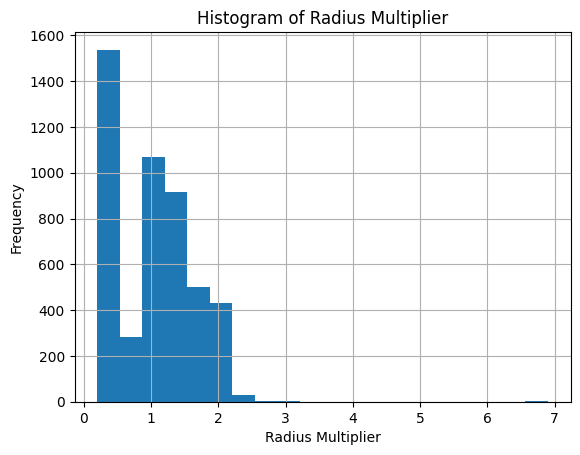

In [15]:
# Univariate analysis of radius multiplier
radius_multiplier = exodata['radius_multiplier']
print(radius_multiplier.describe())
radius_multiplier.hist(bins=20)
plt.xlabel('Radius Multiplier')
plt.ylabel('Frequency')
plt.title('Histogram of Radius Multiplier')
plt.show()

count    4765.000000
mean        6.622956
std       140.539995
min         0.005800
25%         0.052300
50%         0.098700
75%         0.243000
max      7506.000000
Name: orbital_radius, dtype: float64


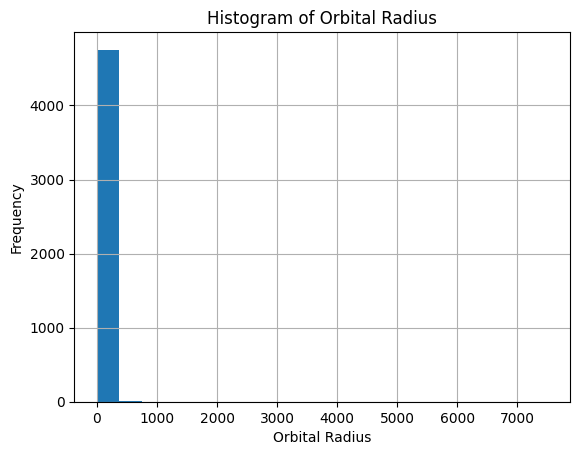

In [16]:
# Univariate analysis of orbital radius
orbital_radius = exodata['orbital_radius']
print(orbital_radius.describe())
orbital_radius.hist(bins=20)
plt.xlabel('Orbital Radius')
plt.ylabel('Frequency')
plt.title('Histogram of Orbital Radius')
plt.show()

count    4.765000e+03
mean     4.800234e+02
std      1.754298e+04
min      5.475702e-04
25%      1.259411e-02
50%      3.312800e-02
75%      1.240246e-01
max      1.101370e+06
Name: orbital_period, dtype: float64


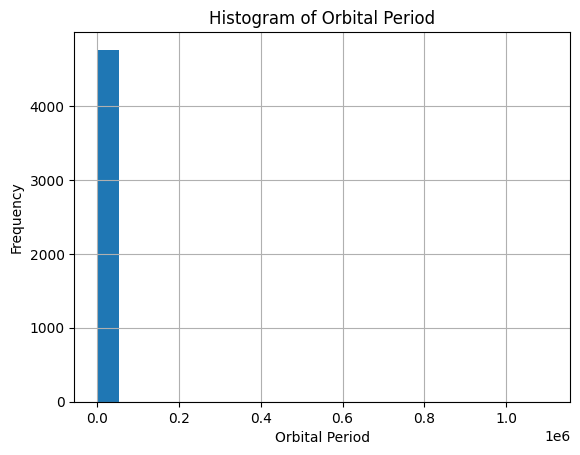

In [17]:
# Univariate analysis of orbital period
orbital_period = exodata['orbital_period']
print(orbital_period.describe())
orbital_period.hist(bins=20)
plt.xlabel('Orbital Period')
plt.ylabel('Frequency')
plt.title('Histogram of Orbital Period')
plt.show()

count    4765.000000
mean        0.067635
std         0.145240
min        -0.520000
25%         0.000000
50%         0.000000
75%         0.068000
max         0.950000
Name: eccentricity, dtype: float64


Text(0.5, 1.0, 'Histogram of Eccentricity')

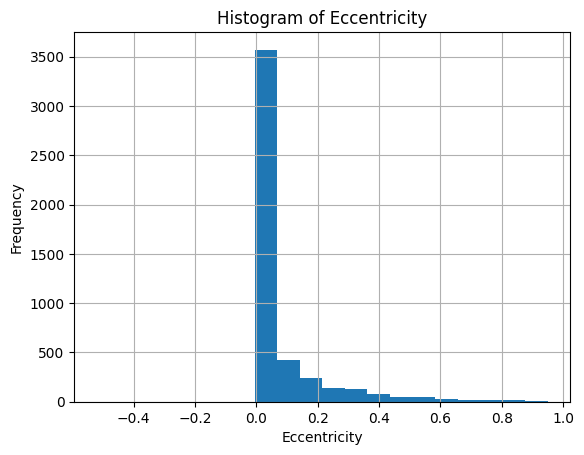

In [18]:
# Univariate analysis of eccentricity
eccentricity = exodata['eccentricity']
print(eccentricity.describe())
eccentricity.hist(bins=20)
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.title('Histogram of Eccentricity')

count                     4765
unique                    4765
top       11 Comae Berenices b
freq                         1
Name: name, dtype: object


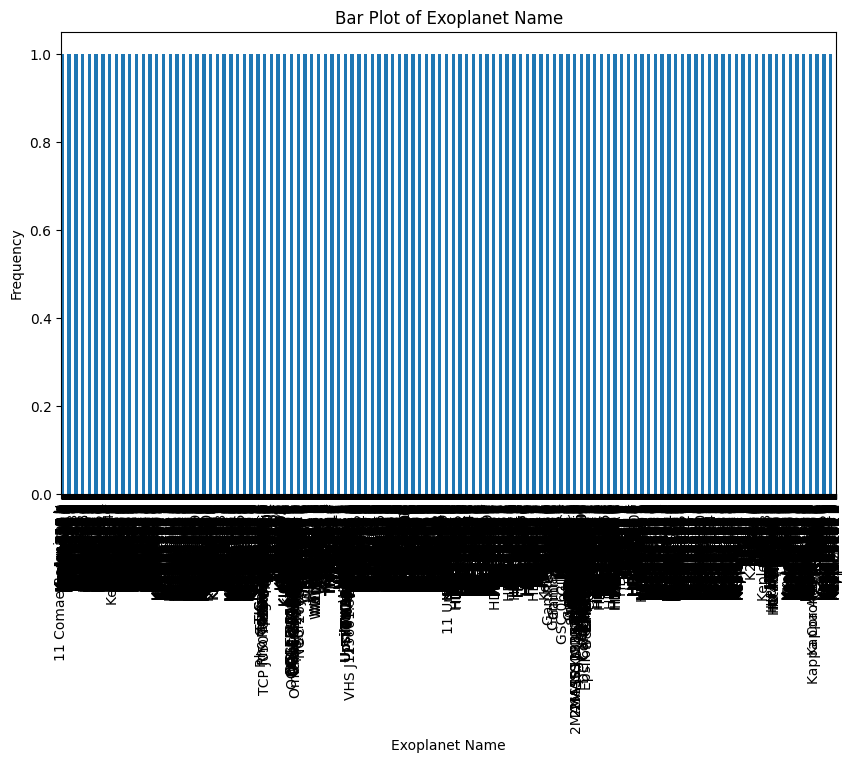

In [19]:
# Univariate Analysis of Exoplanet Name
exoplanet_name = exodata['name']
print(exoplanet_name.describe())
exoplanet_name.value_counts()
plt.figure(figsize=(10, 6))
exoplanet_name.value_counts().plot(kind='bar')
plt.xlabel('Exoplanet Name')
plt.ylabel('Frequency')
plt.title('Bar Plot of Exoplanet Name')
plt.show()


count             4765
unique               4
top       Neptune-like
freq              1670
Name: planet_type, dtype: object


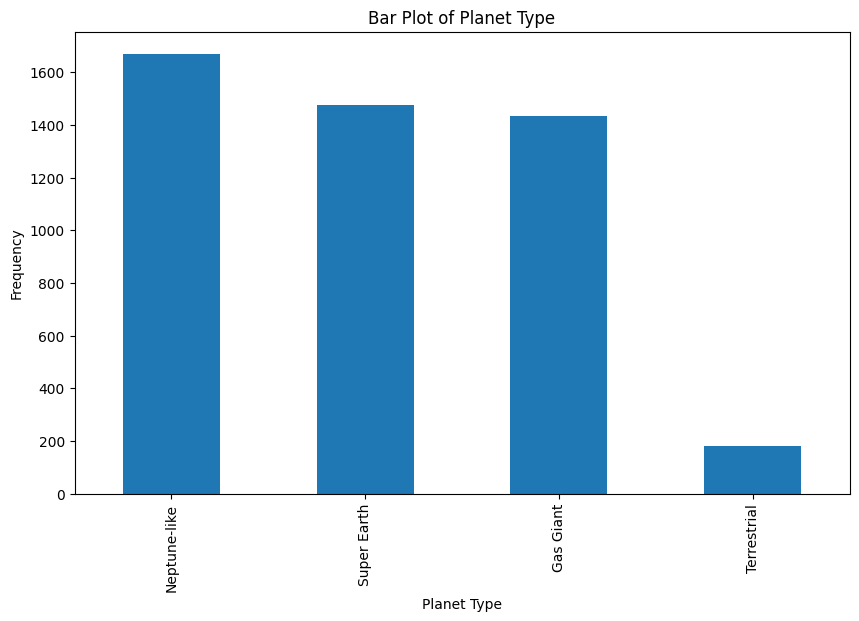

In [20]:
# # Univariate Analysis of planet type
planet_type = exodata['planet_type']
print(planet_type.describe())
planet_type.value_counts()
plt.figure(figsize=(10, 6))
planet_type.value_counts().plot(kind='bar')
plt.xlabel('Planet Type')
plt.ylabel('Frequency')
plt.title('Bar Plot of Planet Type')
plt.show()

count      4765
unique        2
top       Earth
freq       3301
Name: mass_wrt, dtype: object


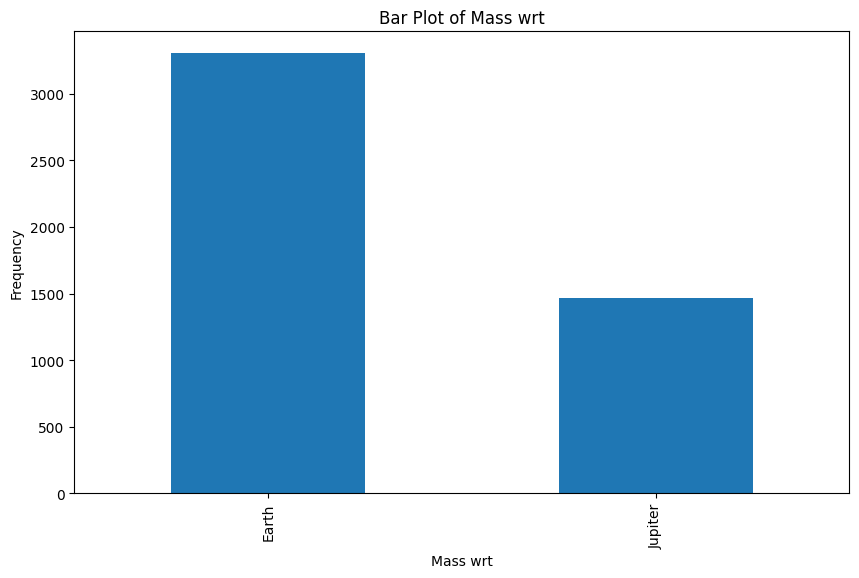

In [21]:
# Univariate Analysis of mass wrt
mass_wrt = exodata['mass_wrt']
print(mass_wrt.describe())
mass_wrt.value_counts()
plt.figure(figsize=(10, 6))
mass_wrt.value_counts().plot(kind='bar')
plt.xlabel('Mass wrt')
plt.ylabel('Frequency')
plt.title('Bar Plot of Mass wrt')
plt.show()


count        4765
unique          2
top       Jupiter
freq         2989
Name: radius_wrt, dtype: object


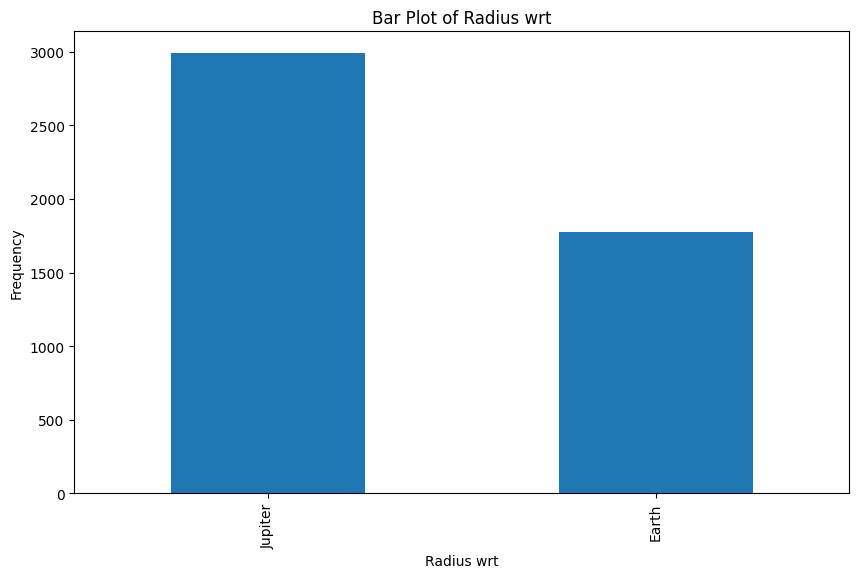

In [22]:
# Univariate Analysis of radius wrt
radius_wrt = exodata['radius_wrt']
print(radius_wrt.describe())
radius_wrt.value_counts()
plt.figure(figsize=(10, 6))
radius_wrt.value_counts().plot(kind='bar')
plt.xlabel('Radius wrt')
plt.ylabel('Frequency')
plt.title('Bar Plot of Radius wrt')
plt.show()


count        4765
unique         11
top       Transit
freq         3683
Name: detection_method, dtype: object


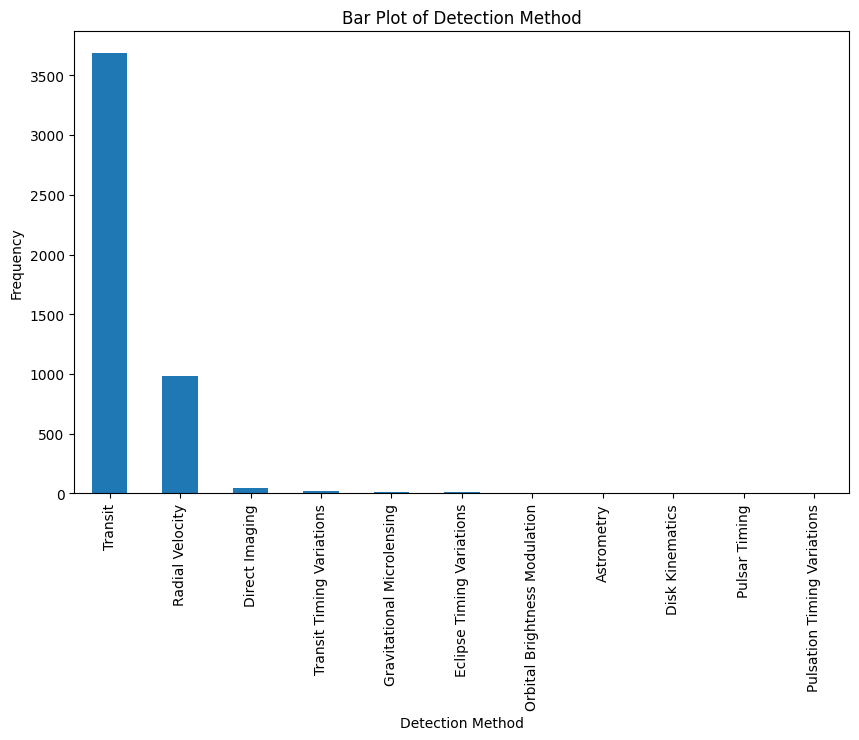

In [23]:
# Univariate Analysis of detection method
detection_method = exodata['detection_method']
print(detection_method.describe())
detection_method.value_counts()
plt.figure(figsize=(10, 6))
detection_method.value_counts().plot(kind='bar')
plt.xlabel('Detection Method')
plt.ylabel('Frequency')
plt.title('Bar Plot of Detection Method')
plt.show()


count      4765.000000
mean        455.658539
std        3918.989890
min           0.027500
25%           3.930000
50%           8.350000
75%         143.010000
max      238985.600000
Name: mass_earth, dtype: float64


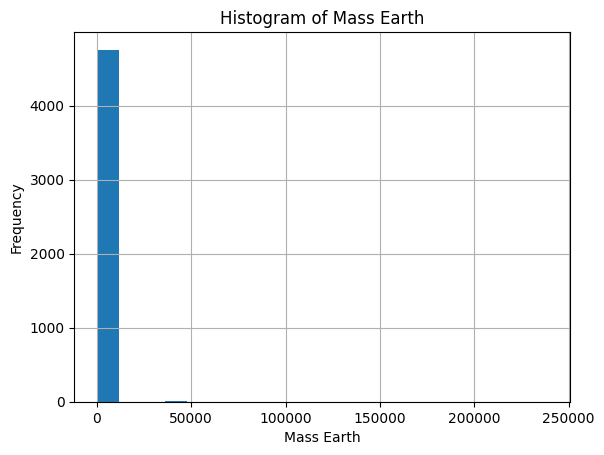

In [24]:
# Univariate analysis of Mass Earth
earth_mass = exodata['mass_earth']
print(earth_mass.describe())
earth_mass.hist(bins=20)
plt.xlabel('Mass Earth')
plt.ylabel('Frequency')
plt.title('Histogram of Mass Earth')
plt.show()


count    4765.000000
mean        5.536780
std         5.311632
min         0.296000
25%         1.750000
50%         2.699200
75%        11.289600
max        77.280000
Name: radius_earth, dtype: float64


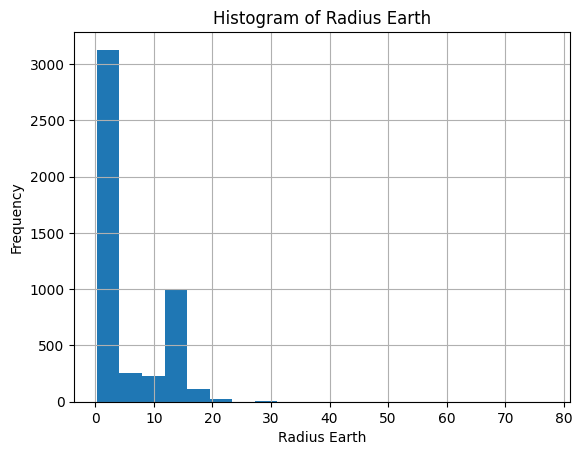

In [25]:
# # Univariate analysis of Earth Radius
earth_radius = exodata['radius_earth']
print(earth_radius.describe())
earth_radius.hist(bins=20)
plt.xlabel('Radius Earth')
plt.ylabel('Frequency')
plt.title('Histogram of Radius Earth')
plt.show()


discovery_year
2023       5
2022     220
2021     472
2020     203
2019     158
2018     234
2017     135
2016    1471
2015     142
2014     857
2013     119
2012     132
2011     132
2010      92
2009      93
2008      59
2007      52
2006      28
2005      34
2004      24
2003      20
2002      29
2001      12
2000      15
1999      13
1998       6
1997       1
1996       6
1995       1
dtype: int64


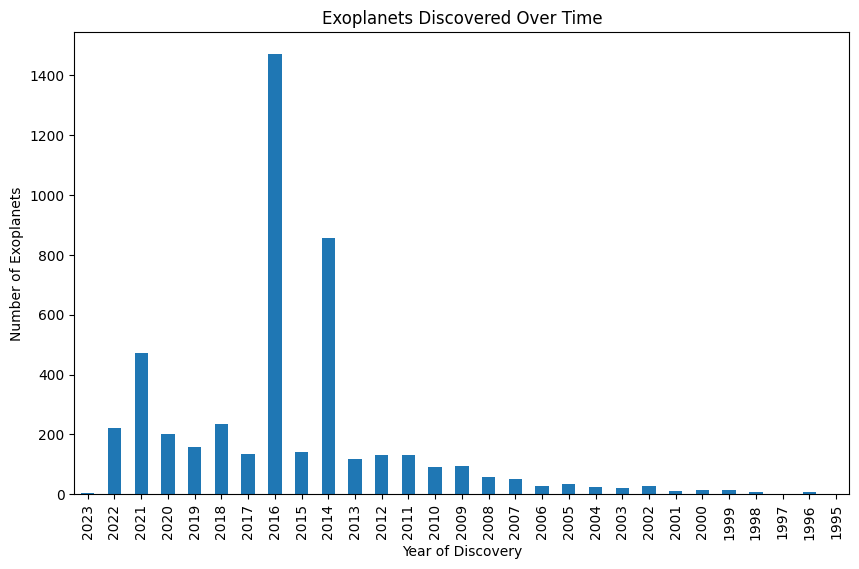

In [26]:
# Bivariate Analysis of no. of exoplanets and year of discovery
exoplanet_discovery_year = exodata.groupby('discovery_year').size().sort_index(ascending=False)
print(exoplanet_discovery_year)
plt.figure(figsize=(10, 6))
exoplanet_discovery_year.plot(kind='bar')
plt.xlabel('Year of Discovery')
plt.ylabel('Number of Exoplanets')
plt.title('Exoplanets Discovered Over Time')
plt.show()


planet_type
Neptune-like    1670
Super Earth     1477
Gas Giant       1435
Terrestrial      183
dtype: int64


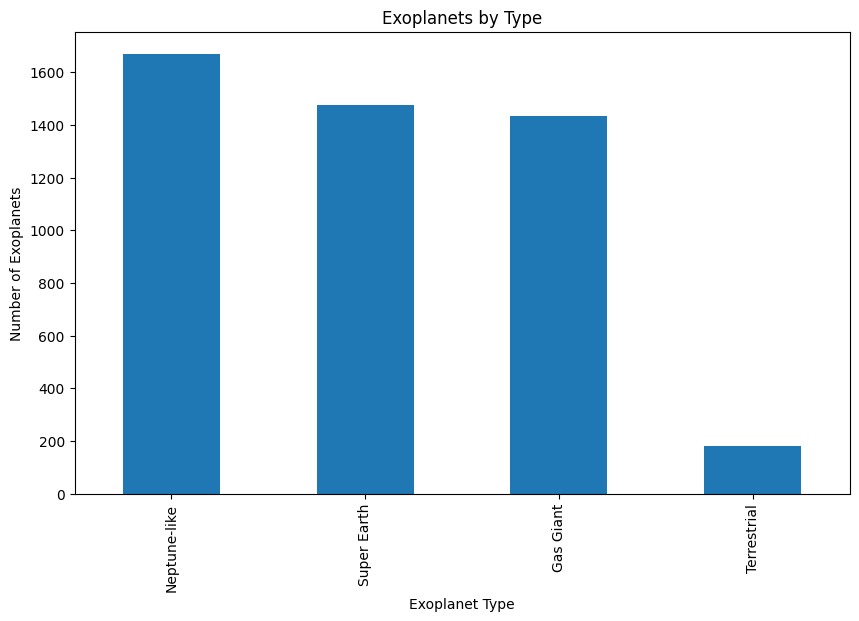

In [27]:
# Bivariate analysis of exoplanet and exoplanet type
exoplanet_type = exodata.groupby('planet_type').size().sort_values(ascending=False)
print(exoplanet_type)
px.pie(exoplanet_type, values=exoplanet_type.values, names=exoplanet_type.index, title='Exoplanet Types').show()

plt.figure(figsize=(10, 6))
exoplanet_type.plot(kind='bar')
plt.xlabel('Exoplanet Type')
plt.ylabel('Number of Exoplanets')
plt.title('Exoplanets by Type')
plt.show()


distance_group
Close     1943
Medium    1849
Far        973
dtype: int64


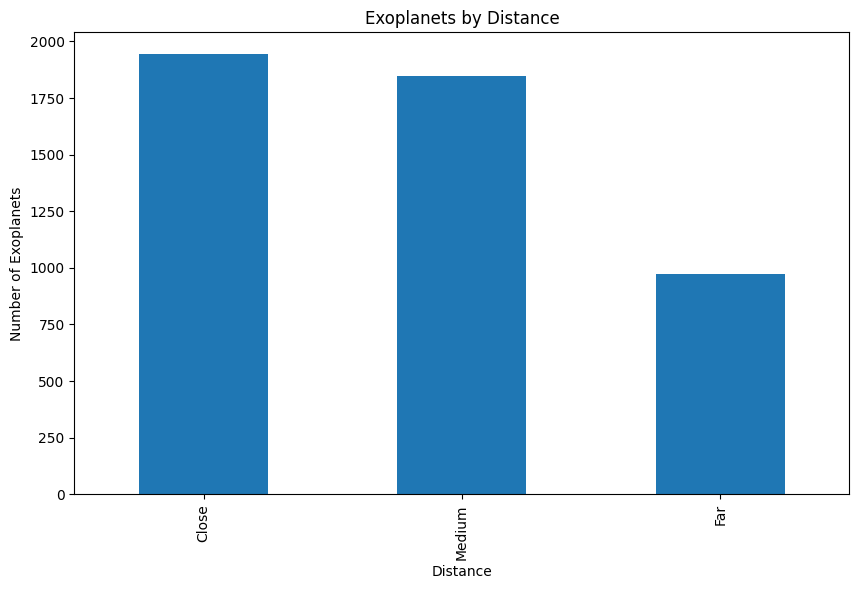

In [28]:
# Distance from earth

# Bivariate analysis of exoplanet and distance

# Let's do some feature engineering to classify distance in various groups

exoplanet_distance = exodata.groupby('distance_group').size().sort_values(ascending=False)
print(exoplanet_distance)
plt.figure(figsize=(10, 6))
exoplanet_distance.plot(kind='bar')
plt.xlabel('Distance')
plt.ylabel('Number of Exoplanets')
plt.title('Exoplanets by Distance')
plt.show()


stellar_magnitude_group
High      3761
Medium     939
Low         65
dtype: int64


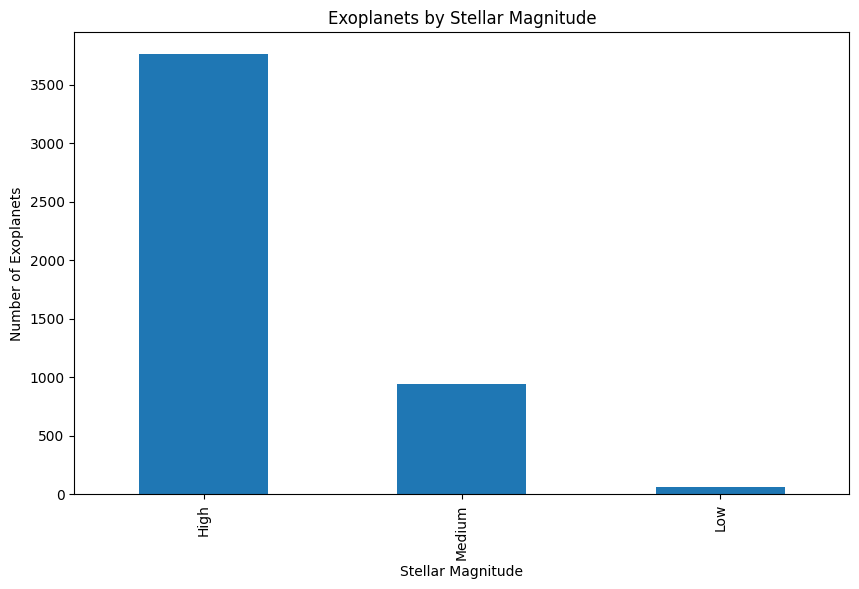

In [29]:
# Stellar Magnitude - For example, a magnitude 1 star is not 2 times as bright as a magnitude 2 star
# Bivariate analysis of exoplanet and stellar magnitude
# Feature engineering to classify stellar magnitude in various groups

exoplanet_stellar_magnitude = exodata.groupby('stellar_magnitude_group').size().sort_values(ascending=False)
print(exoplanet_stellar_magnitude)
plt.figure(figsize=(10, 6))
exoplanet_stellar_magnitude.plot(kind='bar')
plt.xlabel('Stellar Magnitude')
plt.ylabel('Number of Exoplanets')
plt.title('Exoplanets by Stellar Magnitude')
plt.show()


mass_group
Medium    3203
Large      792
Small      770
dtype: int64


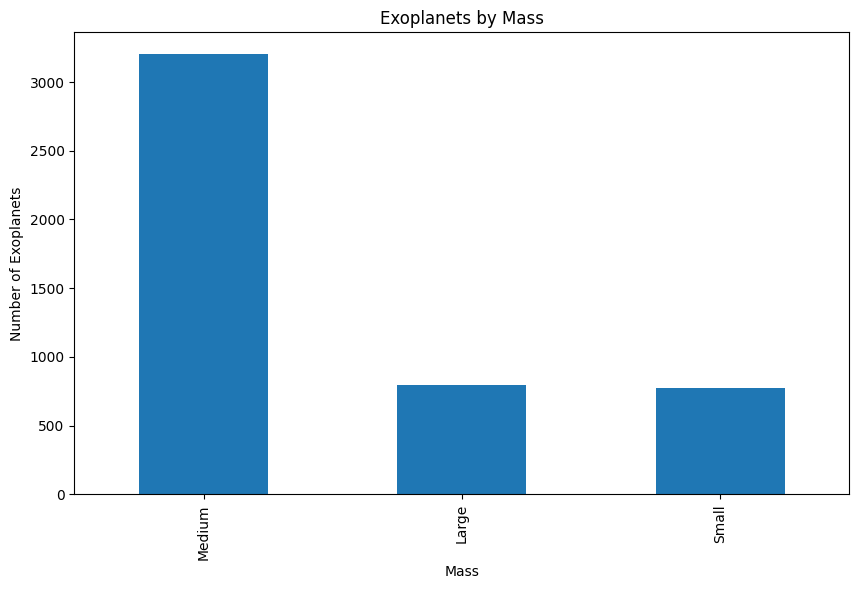

In [30]:
# Bivariate Analysis of exoplanet and its Mass from Jupiter
# Feature engineering to classify mass in various groups

exoplanet_mass = exodata.groupby('mass_group').size().sort_values(ascending=False)
print(exoplanet_mass)
plt.figure(figsize=(10, 6))
exoplanet_mass.plot(kind='bar')
plt.xlabel('Mass')
plt.ylabel('Number of Exoplanets')
plt.title('Exoplanets by Mass')
plt.show()



radius_group
Medium    2780
Small     1985
dtype: int64


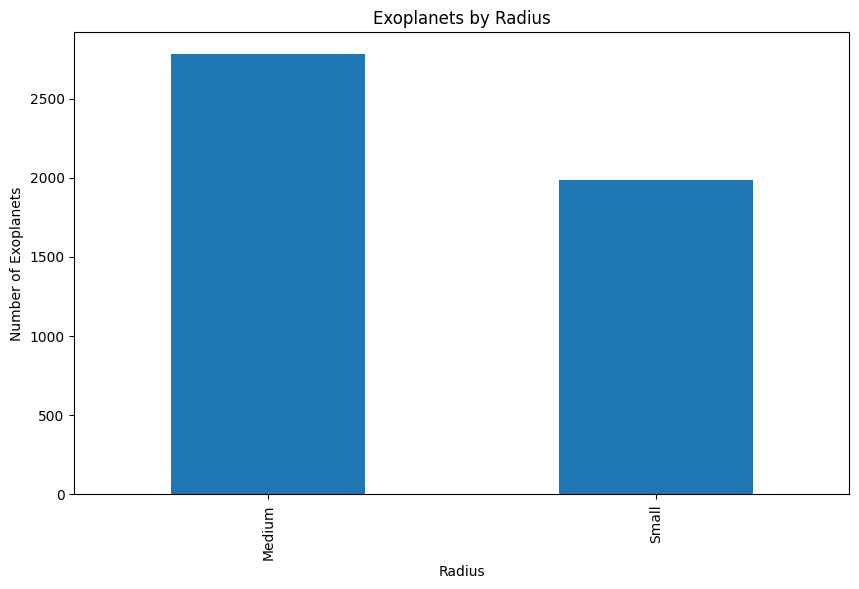

In [31]:
# Radius x Jupiter (estimate)
# Bivariate analysis of exoplanet and its radius
# Feature engineering to classify radius in various groups

exoplanet_radius = exodata.groupby('radius_group').size().sort_values(ascending=False)
print(exoplanet_radius)
plt.figure(figsize=(10, 6))
exoplanet_radius.plot(kind='bar')
plt.xlabel('Radius')
plt.ylabel('Number of Exoplanets')
plt.title('Exoplanets by Radius')
plt.show()

orbital_radius_group
Small     4738
Medium      20
Large        7
dtype: int64


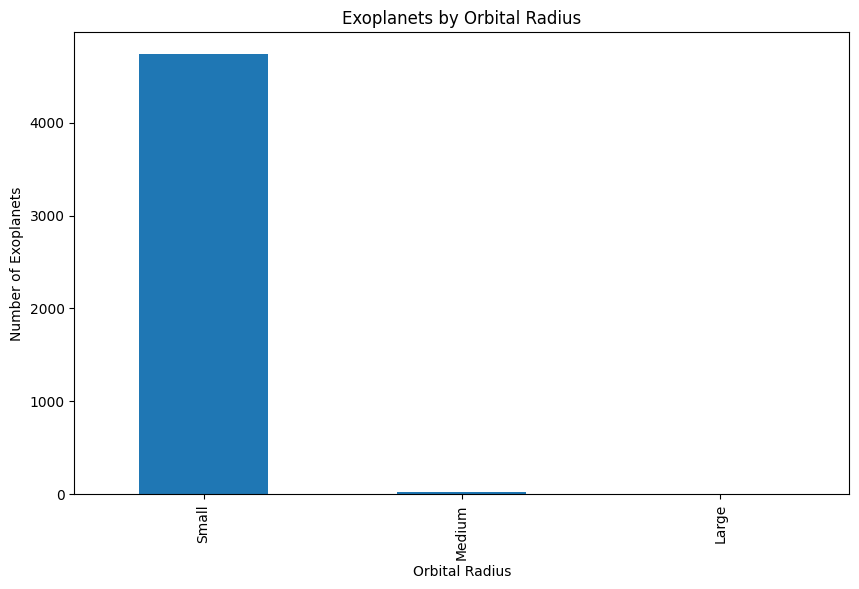

In [32]:
# Bivariate Analysis of exoplanet and its Orbital Radius
# Feature Engineering to classify Orbital Radius in various groups

exoplanet_orbital_radius = exodata.groupby('orbital_radius_group').size().sort_values(ascending=False)
print(exoplanet_orbital_radius)
plt.figure(figsize=(10, 6))
exoplanet_orbital_radius.plot(kind='bar')
plt.xlabel('Orbital Radius')
plt.ylabel('Number of Exoplanets')
plt.title('Exoplanets by Orbital Radius')
plt.show()

orbital_period_group
Small     4720
Large       28
Medium      17
dtype: int64


Text(0.5, 1.0, 'Exoplanets by Orbital Period')

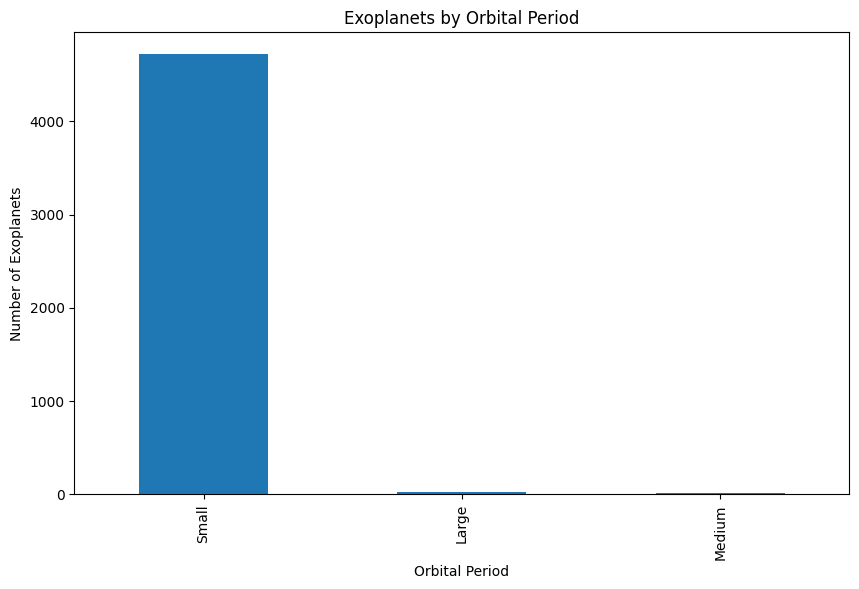

In [33]:
# Bivariate Analysis of exoplanet and its Orbital Period
# Feature Engineering to classify Orbital Period in various groups

exoplanet_orbital_period = exodata.groupby('orbital_period_group').size().sort_values(ascending=False)
print(exoplanet_orbital_period)
plt.figure(figsize=(10, 6))
exoplanet_orbital_period.plot(kind='bar')
plt.xlabel('Orbital Period')
plt.ylabel('Number of Exoplanets')
plt.title('Exoplanets by Orbital Period')


Text(0.5, 1.0, 'Exoplanets by Eccentricity')

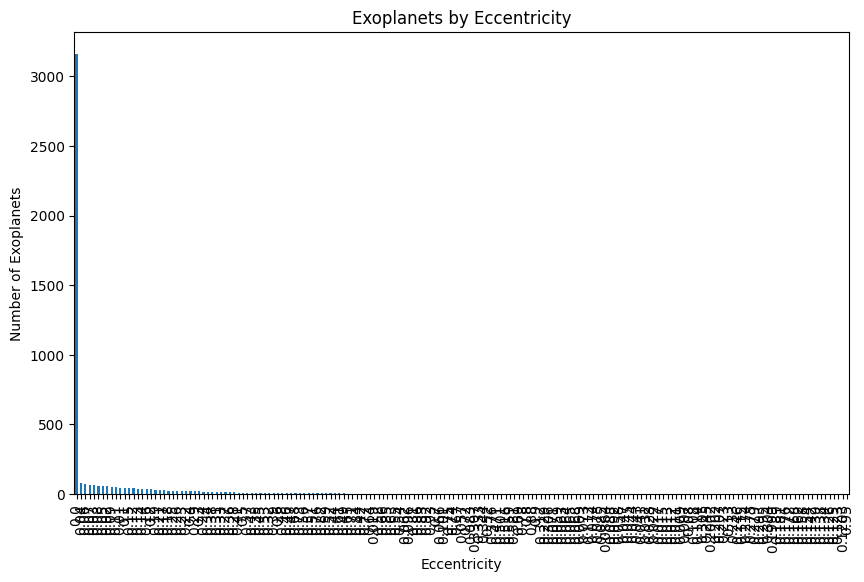

In [34]:
# Bivariate Analysis of exoplanet and its Eccentricity
# Feature Engineering to classify Eccentricity in various groups

exoplanet_eccentricity = exodata.groupby('eccentricity').size().sort_values(ascending=False)
#print(exoplanet_eccentricity)
plt.figure(figsize=(10, 6))
exoplanet_eccentricity.plot(kind='bar')
plt.xlabel('Eccentricity')
plt.ylabel('Number of Exoplanets')
plt.title('Exoplanets by Eccentricity')



detection_method
Transit                          3683
Radial Velocity                   982
Direct Imaging                     49
Transit Timing Variations          21
Gravitational Microlensing         12
Eclipse Timing Variations          11
Orbital Brightness Modulation       3
Astrometry                          1
Disk Kinematics                     1
Pulsar Timing                       1
Pulsation Timing Variations         1
dtype: int64


Text(0.5, 1.0, 'Exoplanets by Detection Method')

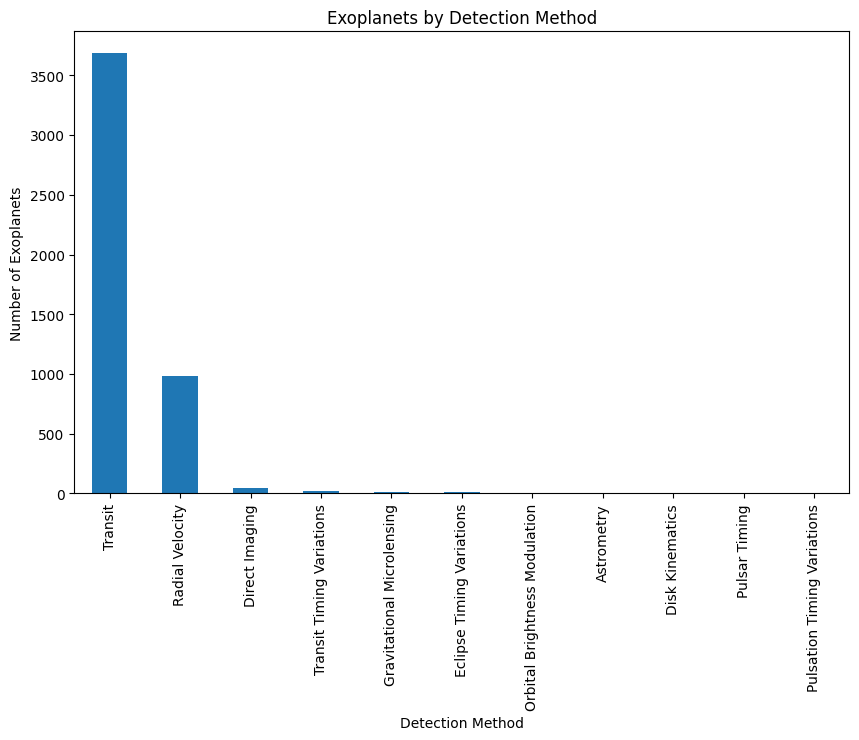

In [35]:
# Bivariate Analysis of exoplanet and its Detection Method
exoplanet_detection_method = exodata.groupby('detection_method').size().sort_values(ascending=False)
print(exoplanet_detection_method)
px.pie(exoplanet_detection_method, values=exoplanet_detection_method.values, names=exoplanet_detection_method.index, title='Exoplanet Detection Methods').show()

plt.figure(figsize=(10, 6))
exoplanet_detection_method.plot(kind='bar')
plt.xlabel('Detection Method')
plt.ylabel('Number of Exoplanets')
plt.title('Exoplanets by Detection Method')


# **Bivariate Analysis**

**Categorical vs Categorical**

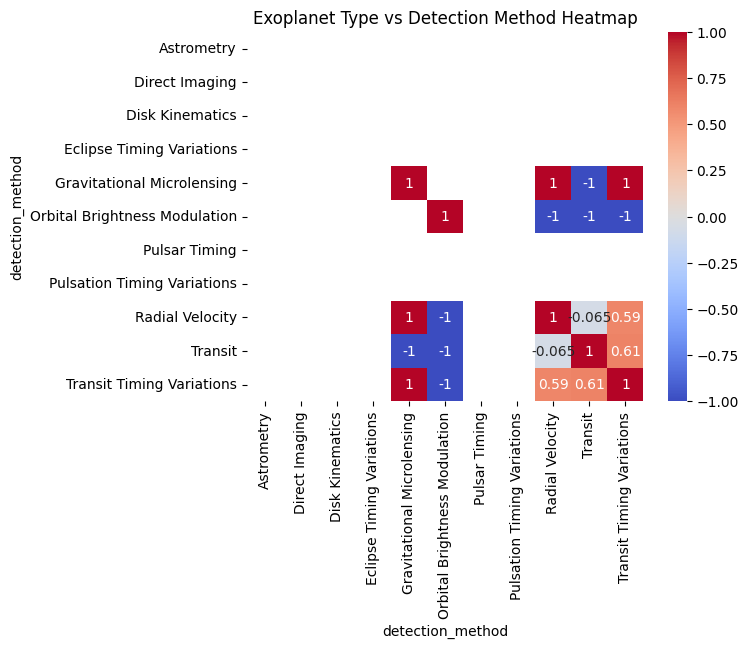

'\nKEY FINDINGS\n\n# So far, our analysis showing that most of the exoplanets (more than 95%) have been discovered using Transit method and Radial Velocity method.\n# Out of 95%, there is huge % dominated by Transit Method which is more than 75% and almost 20% by Radial Velocity.\n# There are 4 Types of planets (Neptune Like, Super Earth, Gas Giant and Terrestrial) that are discovered by Transit Method.\n# Most Interestingly, there is no correlation between exoplanet type and detection method.\n# It is worth mentioning that almost all Terrestrial exoplanets have been discovered using Transit Method.\n# it is a potential factor to analyze Exoplanet Type vs Detection Method\n'

In [36]:
# Let's do some Bivariate analysis using Categorical vs Categorical

exoplanet_type_discovery_method = exodata.groupby(['planet_type', 'detection_method']).size().unstack()
#print(exoplanet_type_discovery_method)
px.bar(exoplanet_type_discovery_method, x=exoplanet_type_discovery_method.index, y=exoplanet_type_discovery_method.columns, barmode='group', title='Exoplanet Type vs Discovery Method').show()

# We would like to check if there is any coorelation or correspondence between exoplanet type and discovery method.
exoplanet_type_discovery_method_corr = exoplanet_type_discovery_method.corr()
#print(exoplanet_type_discovery_method_corr)
sns.heatmap(exoplanet_type_discovery_method_corr, annot=True, cmap='coolwarm')
plt.title('Exoplanet Type vs Detection Method Heatmap')
plt.show()

"""
KEY FINDINGS

# So far, our analysis showing that most of the exoplanets (more than 95%) have been discovered using Transit method and Radial Velocity method.
# Out of 95%, there is huge % dominated by Transit Method which is more than 75% and almost 20% by Radial Velocity.
# There are 4 Types of planets (Neptune Like, Super Earth, Gas Giant and Terrestrial) that are discovered by Transit Method.
# Most Interestingly, there is no correlation between exoplanet type and detection method.
# It is worth mentioning that almost all Terrestrial exoplanets have been discovered using Transit Method.
# it is a potential factor to analyze Exoplanet Type vs Detection Method
"""



**Numerical vs Numerical**

In [37]:
# Let's do some Bivariate analysis using Numerical vs Numerical

# Exoplanet Radius vs Orbital Period
exo_radius = exodata['radius_multiplier']
exo_orbital_period = exodata['orbital_period']
px.scatter(x=exo_radius, y=exo_orbital_period, title='Exoplanet Radius(Jupiter) vs Orbital Period').show()

# Exoplanet Mass vs Orbital Period
exo_mass = exodata['mass_multiplier']
px.scatter(x=exo_mass, y=exo_orbital_period, title='Exoplanet Mass(Jupiter) vs Orbital Period').show()

# Exoplanet Distance vs Orbital Period
exo_distance = exodata['distance']
px.scatter(x=exo_distance, y=exo_orbital_period, title='Exoplanet Distance(Jupiter) vs Orbital Period').show()

# Exoplanet Radius (Earth) vs Orbital Period
exo_radius_earth = exodata['radius_earth']
px.scatter(x=exo_radius_earth, y=exo_orbital_period, title='Exoplanet Radius(Earth) vs Orbital Period').show()

# Exoplanet Mass (Earth) vs Orbital Period
exo_mass_earth = exodata['mass_earth']
px.scatter(x=exo_mass_earth, y=exo_orbital_period, title='Exoplanet Mass(Earth) vs Orbital Period').show()

# Exoplanet Distance (Earth) vs Orbital Period
exodata['distance_earth'] = exo_distance * exo_radius_earth
exo_distance_earth = exodata['distance_earth']
px.scatter(x=exo_distance_earth, y=exo_orbital_period, title='Exoplanet Distance(Earth) vs Orbital Period').show()


**Categorical vs Numerical**

In [38]:
# Let's do some Bivariate analysis using Categorical vs Numerical
# Find out how many planet types were discovered in each year
# Exoplanet Types vs Discovery Year
exo_type_year_grouping = exodata.groupby(['discovery_year', 'planet_type']).size().unstack()
#print(exo_type_year_grouping)
px.bar(exo_type_year_grouping, x=exo_type_year_grouping.index, y=exo_type_year_grouping.columns, barmode='group', title='Exoplanet Types vs Discovery Year').show()

# **Unsupervised Learning**

**Clustering**

In [39]:
# Analysis by Planet Types
# We need to split mass/radius of exoplanets according to refrence planets (Jupiter and Earth). So, lets build clustring by exoplanet type
# using mass and radius for both refrence planets (Jupiter and Earth)
#cluster_data = exodata[['mass_multiplier', 'radius_multiplier', 'mass_earth', 'radius_earth']]
#px.scatter_matrix(cluster_data, dimensions=['mass_multiplier', 'radius_multiplier', 'mass_earth', 'radius_earth'], title='Scatter Matrix of Exoplanet Data').show()

px.scatter(data_frame=exodata.dropna(subset=['mass_wrt', 'radius_wrt']), x='mass_multiplier', y='radius_multiplier', color='planet_type', facet_col='mass_wrt', facet_row='radius_wrt',
               log_x=True, log_y=True, height=800, hover_name='name', color_discrete_sequence=px.colors.qualitative.G10).show()



In [40]:
# Let's have a single plot by detection method with detailed analysis of all exoplanets

px.scatter(data_frame=exodata, x='orbital_period_days', y='mass_multiplier', color='detection_method', log_x=True, log_y=True,
           height=800, hover_name='name', color_discrete_sequence=px.colors.qualitative.G10).show()

px.pie(exodata['detection_method'].value_counts(), values=exodata['detection_method'].value_counts().values, names=exodata['detection_method'].value_counts().index, title='Exoplanet Detection Methods').show()


In [41]:
# Our analysis showing the domination of Neptune Like and Gas Giant Exoplanets,
# so let's dive deeper to have a single plot with detailed analysis.

# 3D Plot
#px.scatter_3d(data_frame=exodata.dropna(subset=['mass_wrt', 'radius_wrt']), x='mass_multiplier', y='radius_multiplier', z='orbital_period', color='planet_type',
#log_x=True, log_y=True).show()

# 2D Plot
px.scatter(data_frame=exodata, x='orbital_period_days', y='radius_multiplier', color='planet_type', log_x=True, log_y=True,
           height=800, hover_name='name', color_discrete_sequence=px.colors.qualitative.G10).show()


In [42]:
# Let's dive deeper to find out and plot potentially Habitable exoplanet types.
habitable_exoplanets = exodata[exodata['planet_type'].isin(['Super Earth', 'Terrestrial', 'Neptune-like'])]

count_habitable_exoplanets = habitable_exoplanets['planet_type'].value_counts()
print(count_habitable_exoplanets)

# Print Sum of all habitable exoplanets
print(f'\n \n There are approximately {len(habitable_exoplanets)} exoplanets out of total {len(exodata)} that are not Gas Giant')

# Plot
px.pie(count_habitable_exoplanets, values=count_habitable_exoplanets.values, names=count_habitable_exoplanets.index, title='Habitable Exoplanet Types').show()

px.scatter(data_frame=habitable_exoplanets, x='mass_earth', y='radius_earth', color='planet_type', log_x=True, log_y=True,
           height=800, hover_name='name', color_discrete_sequence=px.colors.qualitative.G10).show()



planet_type
Neptune-like    1670
Super Earth     1477
Terrestrial      183
Name: count, dtype: int64

 
 There are approximately 3330 exoplanets out of total 4765 that are not Gas Giant


In [43]:
# Let's find out the detection method of all exoplanets by Orbital Period and Radius Earth.
px.scatter(data_frame=exodata, x='orbital_period', y='radius_earth', hover_name='name',
           color='detection_method', height=800, log_x=True, log_y=True, color_discrete_sequence=px.colors.qualitative.G10).show()


Analysing Potentially Habitable Exoplanets by Detection Method

In [44]:
# Find out and plot all exoplanets by detection method that meet above criteria
# Credit - https://www.kaggle.com/code/mikedelong/looking-for-earth-like-planets-with-scatter-plots
count_earth_like_exoplanets = exodata[orbit_criteria & radius_criteria].groupby('detection_method').size().sort_values(ascending=False)
print(count_earth_like_exoplanets)

# Print Sum of all earth like exoplanets
print(f'\n There are approximately {len(exodata[orbit_criteria & radius_criteria])} habitable (earth like exoplanets) out of total {len(exodata)}')

# Plot
px.pie(count_earth_like_exoplanets, values=count_earth_like_exoplanets.values, names=count_earth_like_exoplanets.index, title='Earth Like Exoplanet By Detection Methods').show()

px.scatter(data_frame=exodata[orbit_criteria & radius_criteria], x='orbital_period', y='radius_earth', hover_name='name',
           color='detection_method', height=800, log_x=True, log_y=True, color_discrete_sequence=px.colors.qualitative.G10).show()

detection_method
Transit            51
Radial Velocity     8
dtype: int64

 There are approximately 59 habitable (earth like exoplanets) out of total 4765


Analysing Potentially Habitable Exoplanets by Planet Type

In [45]:
# Find out and plot all exoplanets by planet type that meet above criteria
# Credit - https://www.kaggle.com/code/mikedelong/looking-for-earth-like-planets-with-scatter-plots

count_earth_like_exoplanets_by_type = exodata[orbit_criteria & radius_criteria].groupby('planet_type').size().sort_values(ascending=False)
print(count_earth_like_exoplanets_by_type)

# Print Sum of all earth like exoplanets
print(f'\n There are approximately {len(exodata[orbit_criteria & radius_criteria])} earth like exoplanets that have a year long orbital and earth like radius out of total {len(exodata)}')

# Plot
px.pie(count_earth_like_exoplanets_by_type, values=count_earth_like_exoplanets_by_type.values, names=count_earth_like_exoplanets_by_type.index, title='Earth Like Exoplanet By Planet Type').show()

px.scatter(data_frame=exodata[orbit_criteria & radius_criteria], x='orbital_period', y='radius_earth', hover_name='name',
           color='planet_type', height=800, log_x=True, log_y=True, color_discrete_sequence=px.colors.qualitative.G10).show()

planet_type
Neptune-like    42
Super Earth     17
dtype: int64

 There are approximately 59 earth like exoplanets that have a year long orbital and earth like radius out of total 4765


**Analysing Potentially Habitable Exoplanets**

In [46]:
# Find out and plot all exoplanets by detection method that meet above criteria
# Credit - https://www.kaggle.com/code/mikedelong/looking-for-earth-like-planets-with-scatter-plots

count_earth_like_exoplanets_by_detection_method = exodata[orbit_criteria & mass_criteria].groupby('detection_method').size().sort_values(ascending=False)
print(count_earth_like_exoplanets_by_detection_method)

# Print Sum of all earth like exoplanets
print(f'\n There are approximately {len(exodata[orbit_criteria & mass_criteria])} habitable (earth like exoplanets) out of total {len(exodata)}')

# Plot
px.pie(count_earth_like_exoplanets_by_detection_method, values=count_earth_like_exoplanets_by_detection_method.values, names=count_earth_like_exoplanets_by_detection_method.index, title='Earth Like Exoplanet By Detection Method').show()

px.scatter(data_frame=exodata[orbit_criteria & mass_criteria], x='orbital_period', y='mass_earth', hover_name='name',
           color='detection_method', height=800, log_x=True, log_y=True, color_discrete_sequence=px.colors.qualitative.G10).show()



detection_method
Transit            55
Radial Velocity     9
dtype: int64

 There are approximately 64 habitable (earth like exoplanets) out of total 4765


**Exoplanets that are more likely to have a rocky composition and support surface liquid water**

In [47]:
# Potentially habitable rocky exoplanets capable of surface liquid water
# Find out and plot all exoplanets by detection method that meet above criteria

count_earth_like_exoplanets_by_detection_method_optim = exodata[orbit_criteria_optim & mass_criteria_optim & radius_criteria_optim].groupby('detection_method').size().sort_values(ascending=False)

print(count_earth_like_exoplanets_by_detection_method_optim)

# Print Sum of all earth like exoplanets
print(f'\n There are approximately {len(exodata[orbit_criteria_optim & mass_criteria_optim & radius_criteria_optim])} exoplanets that are more likely to have a rocky composition and support surface liquid water out of total {len(exodata)}')

# Plot pie
px.pie(count_earth_like_exoplanets_by_detection_method_optim, values=count_earth_like_exoplanets_by_detection_method_optim.values, names=count_earth_like_exoplanets_by_detection_method_optim.index, title='Most Likely Rocky Exoplanets').show()

px.scatter(data_frame=exodata[orbit_criteria_optim & mass_criteria_optim & radius_criteria_optim], x='orbital_period', y='mass_earth', hover_name='name',
           color='detection_method', height=800, log_x=True, log_y=True, color_discrete_sequence=px.colors.qualitative.G10).show()



detection_method
Transit            19
Radial Velocity     5
dtype: int64

 There are approximately 24 exoplanets that are more likely to have a rocky composition and support surface liquid water out of total 4765


**Exoplanets that are more likely to have (:)**

In [48]:
# Exoplanets that are more likely to have (:)
# Find out and plot all exoplanets by detection method that meet above criteria

count_earth_like_exoplanets_by_detection_method_consv = exodata[orbit_criteria_consv & mass_criteria_consv & radius_criteria_consv].groupby('detection_method').size().sort_values(ascending=False)

print(count_earth_like_exoplanets_by_detection_method_consv)

# Print Sum of all earth like exoplanets
print(f'\n There are approximately {len(exodata[orbit_criteria_consv & mass_criteria_consv & radius_criteria_consv])} exoplanets that are most likely to have (:) out of total {len(exodata)}')

# Plot pie
px.pie(count_earth_like_exoplanets_by_detection_method_consv, values=count_earth_like_exoplanets_by_detection_method_consv.values, names=count_earth_like_exoplanets_by_detection_method_consv.index, title='Exoplanets  (:)').show()

px.scatter(data_frame=exodata[orbit_criteria_consv & mass_criteria_consv & radius_criteria_consv], x='orbital_period', y='mass_earth', hover_name='name',
           color='detection_method', height=800, log_x=True, log_y=True, color_discrete_sequence=px.colors.qualitative.G10).show()


detection_method
Transit    1
dtype: int64

 There are approximately 1 exoplanets that are most likely to have (:) out of total 4765


**Exoplanets that are less likely to have a rocky composition or maintain surface liquid water**

In [49]:
# Exoplanets that are less likely to have a rocky composition or maintain surface liquid water
# Find out and plot all exoplanets by detection method that meet above criteria

count_earth_like_exoplanets_by_detection_method_pessi = exodata[orbit_criteria_pessi & mass_criteria_pessi & radius_criteria_pessi].groupby('detection_method').size().sort_values(ascending=False)

print(count_earth_like_exoplanets_by_detection_method_pessi)

# Print Sum of all earth like exoplanets
print(f'\n There are approximately {len(exodata[orbit_criteria_pessi & mass_criteria_pessi & radius_criteria_pessi])} exoplanets that are less likely to have a rocky composition or maintain surface liquid water out of total {len(exodata)}')

# Plot pie
px.pie(count_earth_like_exoplanets_by_detection_method_pessi, values=count_earth_like_exoplanets_by_detection_method_pessi.values, names=count_earth_like_exoplanets_by_detection_method_pessi.index, title='Less Likely Rocky Exoplanets').show()

px.scatter(data_frame=exodata[orbit_criteria_pessi & mass_criteria_pessi & radius_criteria_pessi], x='orbital_period', y='mass_earth', hover_name='name',
           color='detection_method', height=800, log_x=True, log_y=True, color_discrete_sequence=px.colors.qualitative.G10).show()



detection_method
Transit                       27
Radial Velocity               11
Gravitational Microlensing     1
dtype: int64

 There are approximately 39 exoplanets that are less likely to have a rocky composition or maintain surface liquid water out of total 4765


# **Supervised Learning**

Accuracy: 0.9412381951731374


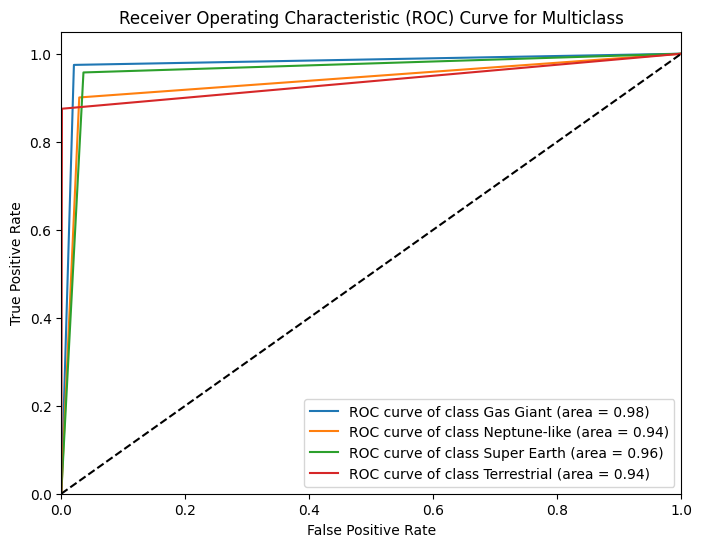

In [50]:
def decision_tree_exoplanets(exodata):
  # 02. Identify and define variables
  # Features: You can choose relevant features for mass classification
  features = ['radius_earth', 'orbital_period', 'stellar_magnitude']
  X = exodata[features]

  # Target variable: Classify mass into categories (e.g., 'Small', 'Medium', 'Large')
  # Assuming 'mass_group' column exists, created earlier in your code
  y = exodata['planet_type']

  # 03. Split Dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # 04. Train Model
  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)

  # 05. Predict on the test set
  y_pred = model.predict(X_test)

  # 06. Evaluate
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)


  """
  print('\n')
  print("Classification Report:")
  print(classification_report(y_test, y_pred))
  print('\n')
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print('\n')
  print("Feature Importance:")
  for feature, importance in zip(features, model.feature_importances_):
      print(f"{feature}: {importance}")

  """
  # 07. Data Visualization through matplotlib Tree
  #plt.figure(figsize=(16,8))
  #tree.plot_tree(model, feature_names=features, class_names=model.classes_, filled=True)
  #plt.show()

  # Handle multiclass ROC curve visualization
  from sklearn.preprocessing import label_binarize
  from sklearn.metrics import roc_auc_score, roc_curve, auc

  # Calculate y_pred_proba here since it was commented out earlier
  y_pred_proba = model.predict_proba(X_test)

  # Binarize the output
  y_test_bin = label_binarize(y_test, classes=model.classes_)
  n_classes = y_test_bin.shape[1]

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Plot ROC curves for each class
  plt.figure(figsize=(8, 6))
  for i in range(n_classes):
      plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(model.classes_[i], roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
  plt.legend(loc="lower right")
  plt.show()

  # 09. Data Visualization through matplotlib Heatmap
  #sns.heatmap(exodata[features].corr(), annot=True, cmap='coolwarm')
  #plt.title('Correlation Heatmap')
  #plt.show()

# Call the function
decision_tree_exoplanets(exodata)


Accuracy: 0.9181532004197271
F1-score: 0.8414838394625628


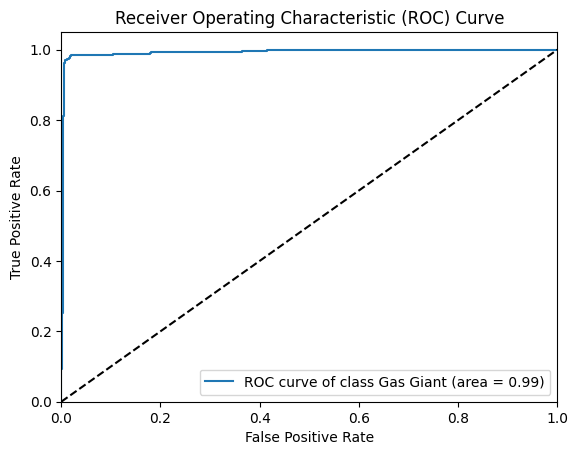

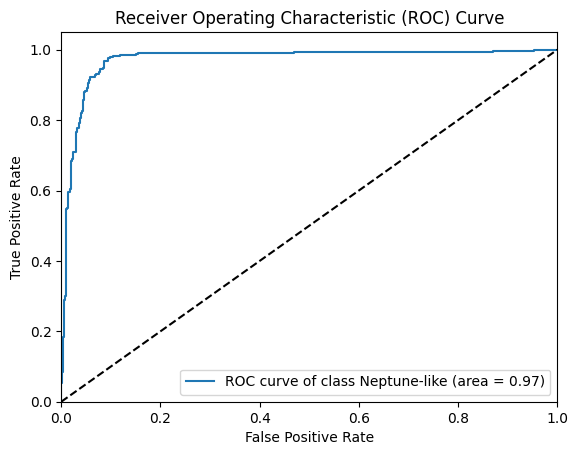

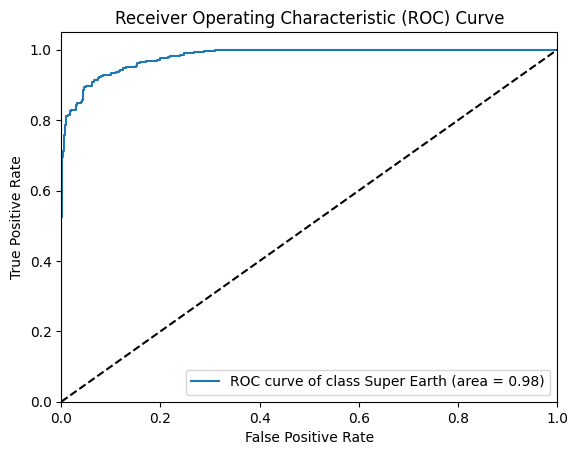

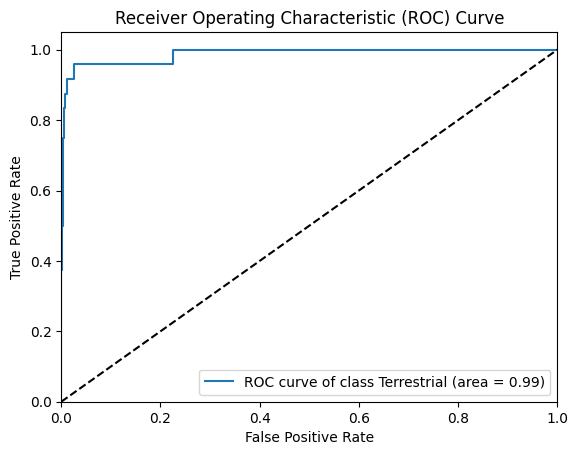

In [51]:
def logistic_regression_exoplanet(exodata):
  # 02. Identify and define variables
  # Features: You can choose relevant features for mass classification
  # Assuming 'radius_earth' and 'orbital_period' are relevant features
  # You can add more features as needed
  features = ['radius_earth', 'orbital_period', 'stellar_magnitude']
  #features = ['radius_earth', 'orbital_period']
  X = exodata[features]

  # Target variable: Classify mass into categories (e.g., 'Small', 'Medium', 'Large')
  # Assuming 'mass_group' column exists, created earlier in your code
  y = exodata['planet_type']

  # 03. Split Dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # 04. Train Model
  # Handle categorical target variable
  label_encoder = LabelEncoder()
  y_train_encoded = label_encoder.fit_transform(y_train)
  y_test_encoded = label_encoder.transform(y_test)

  model = LogisticRegression()
  model.fit(X_train, y_train_encoded)

  # 05. Predict on the test set
  y_pred_encoded = model.predict(X_test)
  y_pred = label_encoder.inverse_transform(y_pred_encoded)

  # 06. Evaluate
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)

  # Assuming 'mass_group' has more than two classes, use macro averaging for F1-score
  f1 = f1_score(y_test, y_pred, average='macro')
  print("F1-score:", f1)

  # Data Visualizaruon & Analysis using ROC Curve
  from sklearn.preprocessing import label_binarize
  from sklearn.metrics import roc_auc_score, roc_curve, auc
  # Calculate y_pred_proba here since it was commented out earlier
  y_pred_proba = model.predict_proba(X_test)
  # Binarize the output
  y_test_bin = label_binarize(y_test, classes=label_encoder.classes_)
  n_classes = y_test_bin.shape[1]
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(label_encoder.classes_[i], roc_auc[i]))
      plt.plot([0, 1], [0, 1], 'k--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver Operating Characteristic (ROC) Curve')
      plt.legend(loc="lower right")
      plt.show()




  # 07. Data Visualization using plotly library Scatter plot
  fig = px.scatter(exodata, x='radius_earth', y='orbital_period', color='planet_type',
                 title='Exoplanet Classification',
                 labels={'radius_earth': 'Radius (Earth)', 'orbital_period': 'Orbital Period'},
                 hover_name='name')
  fig.update_traces(marker=dict(size=10, opacity=0.7))
  fig.update_layout(showlegend=True)
  fig.show()

# Call the function
logistic_regression_exoplanet(exodata)

Accuracy: 0.9338929695697796
F1-score: 0.7088782234536951


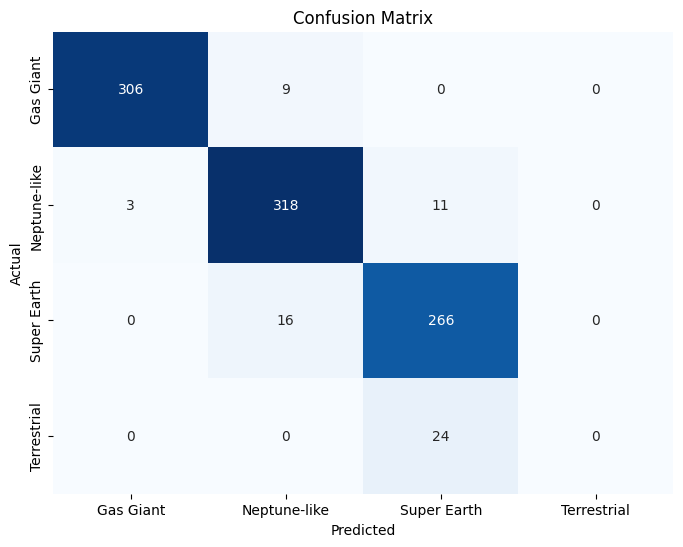

Classification Report:
              precision    recall  f1-score   support

   Gas Giant       0.99      0.97      0.98       315
Neptune-like       0.93      0.96      0.94       332
 Super Earth       0.88      0.94      0.91       282
 Terrestrial       0.00      0.00      0.00        24

    accuracy                           0.93       953
   macro avg       0.70      0.72      0.71       953
weighted avg       0.91      0.93      0.92       953



Confusion Matrix:
[[306   9   0   0]
 [  3 318  11   0]
 [  0  16 266   0]
 [  0   0  24   0]]




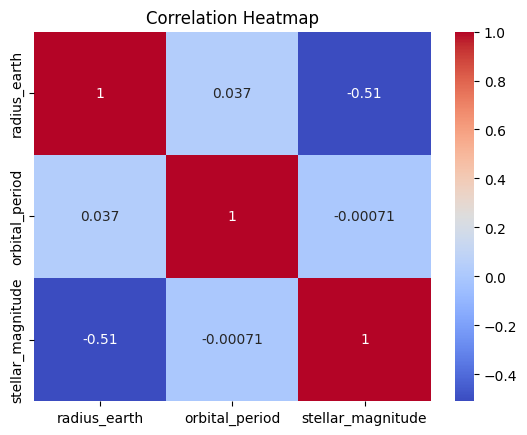

In [52]:
def svm_exoplanet(exodata):
  # 02. Identify and define variables
  features = ['radius_earth', 'orbital_period', 'stellar_magnitude']
  X = exodata[features]
  y = exodata['planet_type']

  # 03. Split Dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # 04. Train Model
  # Scale features for better SVM performance
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  model = SVC()
  model.fit(X_train_scaled, y_train)

  # 05. Predict on the test set
  y_pred = model.predict(X_test_scaled)

  # 06. Evaluate
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)

  # Assuming 'mass_group' has more than two classes, use macro averaging for F1-score
  f1 = f1_score(y_test, y_pred, average='macro')
  print("F1-score:", f1)

  # 07. Data Visualization using plotly library
  fig = px.scatter(exodata, x='radius_earth', y='orbital_period', color='planet_type',
                 title='Exoplanet Classification with SVM',
                 labels={'radius_earth': 'Radius (Earth)', 'orbital_period': 'Orbital Period'},
                 hover_name='name')
  fig.update_traces(marker=dict(size=10, opacity=0.7))
  fig.update_layout(showlegend=True)
  fig.show()

  # 07. Data Visualization using plotly library
  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()
  # 07. Data Visualization using plotly library
  # Classification Report
  print("Classification Report:")
  print(classification_report(y_test, y_pred))
  print('\n')
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print('\n')

  # 07. Data Visualization through matplotlib Heatmap
  sns.heatmap(exodata[features].corr(), annot=True, cmap='coolwarm')
  plt.title('Correlation Heatmap')
  plt.show()


  # Call the function
svm_exoplanet(exodata)

Accuracy: 0.8667366211962224
F1-score: 0.658935719770103


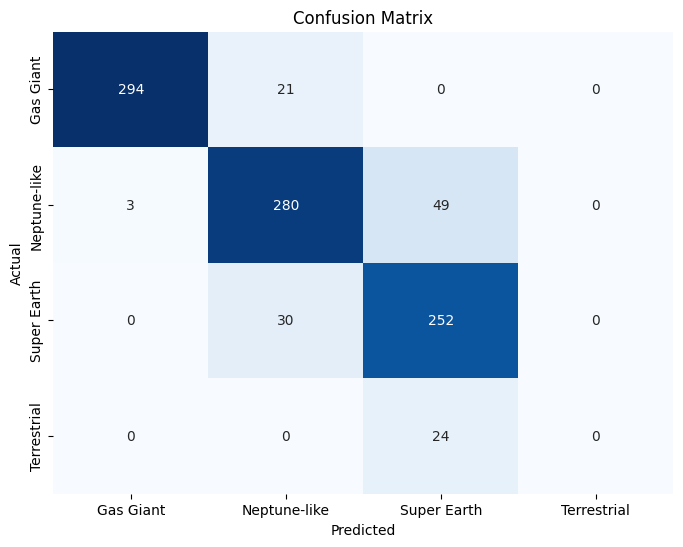

Classification Report:
              precision    recall  f1-score   support

   Gas Giant       0.99      0.93      0.96       315
Neptune-like       0.85      0.84      0.84       332
 Super Earth       0.78      0.89      0.83       282
 Terrestrial       0.00      0.00      0.00        24

    accuracy                           0.87       953
   macro avg       0.65      0.67      0.66       953
weighted avg       0.85      0.87      0.86       953



Confusion Matrix:
[[294  21   0   0]
 [  3 280  49   0]
 [  0  30 252   0]
 [  0   0  24   0]]




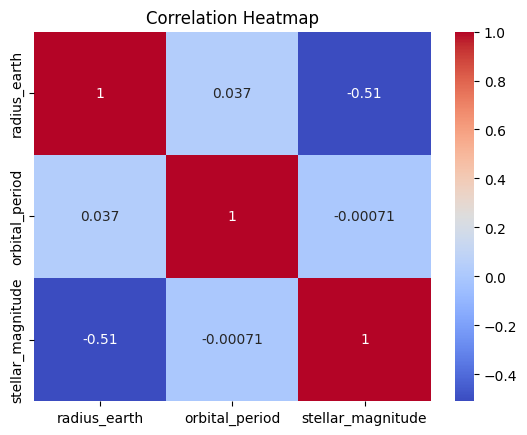

In [53]:
def naive_bayes_exoplanet(exodata):
  # 02. Identify and define variables
  features = ['radius_earth', 'orbital_period', 'stellar_magnitude']
  X = exodata[features]
  y = exodata['planet_type']

  # 03. Split Dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # 04. Train Model
  model = GaussianNB()
  model.fit(X_train, y_train)

  # 05. Predict on the test set
  y_pred = model.predict(X_test)

  # 06. Evaluate
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)

  # Assuming 'planet_type' has more than two classes, use macro averaging for F1-score
  f1 = f1_score(y_test, y_pred, average='macro')
  print("F1-score:", f1)

  # 07. Data Visualization using plotly library
  fig = px.scatter(exodata, x='radius_earth', y='orbital_period', color='planet_type',
                 title='Exoplanet Classification with Naive Bayes',
                 labels={'radius_earth': 'Radius (Earth)', 'orbital_period': 'Orbital Period'},
                 hover_name='name')
  fig.update_traces(marker=dict(size=10, opacity=0.7))
  fig.update_layout(showlegend=True)
  fig.show()

  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

  # Classification Report
  print("Classification Report:")
  print(classification_report(y_test, y_pred))
  print('\n')
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print('\n')

  # Correlation Heatmap
  sns.heatmap(exodata[features].corr(), annot=True, cmap='coolwarm')
  plt.title('Correlation Heatmap')
  plt.show()

# Call the function
naive_bayes_exoplanet(exodata)

Accuracy: 0.950682056663169
F1-score: 0.9416854193550183


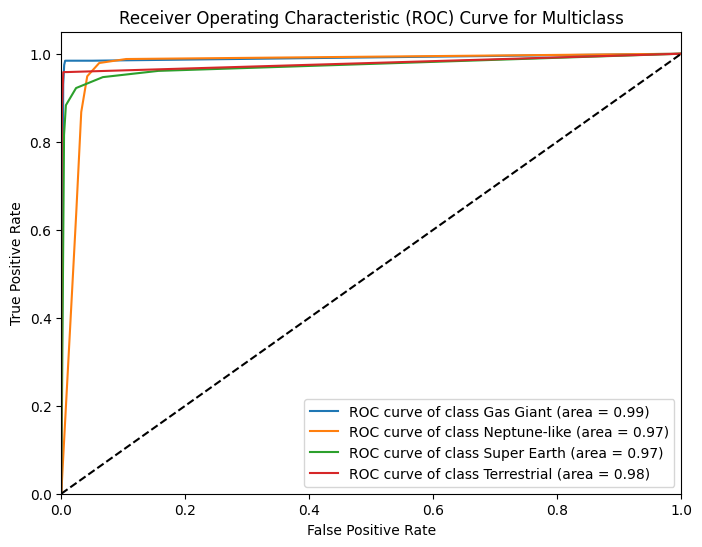

In [54]:
def knn_exoplanet_roc(exodata):
  # 02. Identify and define variables
  features = ['radius_earth', 'orbital_period', 'stellar_magnitude']
  X = exodata[features]
  y = exodata['planet_type']

  # 03. Split Dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # 04. Train Model
  # Scale features for better KNN performance
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  model = KNeighborsClassifier()
  model.fit(X_train_scaled, y_train)

  # 05. Predict on the test set
  y_pred = model.predict(X_test_scaled)

  # 06. Evaluate
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)

  # Assuming 'planet_type' has more than two classes, use macro averaging for F1-score
  f1 = f1_score(y_test, y_pred, average='macro')
  print("F1-score:", f1)

  # 07. Data Visualization ROC Analysis
  from sklearn.preprocessing import label_binarize
  from sklearn.metrics import roc_auc_score, roc_curve, auc

  # Calculate y_pred_proba
  y_pred_proba = model.predict_proba(X_test_scaled)

  # Binarize the output
  y_test_bin = label_binarize(y_test, classes=model.classes_)
  n_classes = y_test_bin.shape[1]

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Plot ROC curves for each class
  plt.figure(figsize=(8, 6))
  for i in range(n_classes):
      plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(model.classes_[i], roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
  plt.legend(loc="lower right")
  plt.show()

# Call the function
knn_exoplanet_roc(exodata)

Concluded on 18th August, 2024 1:05:00 AM based on current dataset (not up-to-date). If you like my effort and work please share it with other community members and WORK FOR PEACE, HEALTH AND HAPPINESS on our planet (:).

If you would like to work with me drop me an email jahmalik1980@gmail.com visit my website https://commercewit.com 